## Iowa Liquor Sale Aanalysis - Daily Analysis

In [2]:
import numpy as np
import pandas as pd

import os
import tarfile

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

np.random.seed(123)

In [3]:
import csv
TextFileReader = pd.read_csv('Condensed_Iowa_Liquor_Sales.csv',chunksize=100000, engine='python')

dfList = []
for df in TextFileReader:
    dfList.append(df)

condensed = pd.concat(dfList,sort=False)
condensed

,Date,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),qtr_date
0,2014-12-26,2648,50265,77,1081312,380,83363,12,750,5.15,7.73,3,23.19,2,2014-10-01
1,2015-06-16,3625,50021,77,1031080,260,37418,6,1750,8.50,12.75,12,153.00,21,2015-04-01
2,2013-07-29,2629,51503,78,1051110,434,55087,12,1000,6.52,9.79,12,117.48,12,2013-07-01
3,2013-01-02,3735,52577,10,1032080,35,34422,6,1000,21.77,32.66,6,195.96,6,2013-01-01
4,2014-07-08,2619,50266,77,1081015,130,64135,12,375,7.50,11.25,6,67.50,2,2014-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16259889,2012-03-29,2527,50315,77,1031080,380,37346,12,750,3.48,5.23,12,62.76,9,2012-01-01
16259890,2013-03-14,4103,50010,85,1041100,434,31656,12,750,3.39,5.09,12,61.08,9,2013-01-01
16259891,2012-12-18,2573,52761,70,1081600,421,64867,12,1000,11.33,17.00,24,408.00,24,2012-10-01
16259892,2013-05-29,2191,52632,56,1062200,35,43126,12,750,7.53,11.30,2,22.60,1,2013-04-01


In [4]:
condensed.dtypes

Date                     object
Store Number              int64
Zip Code                 object
County Number             int64
Category                  int64
Vendor Number             int64
Item Number               int64
Pack                      int64
Bottle Volume (ml)        int64
State Bottle Cost       float64
State Bottle Retail     float64
Bottles Sold              int64
Sale (Dollars)          float64
Volume Sold (Liters)      int64
qtr_date                 object
dtype: object

In [5]:
condensed['Date'] = pd.to_datetime(condensed['Date'])
condensed['qtr_date'] = pd.to_datetime(condensed['qtr_date'])
condensed = condensed.astype({'Zip Code': 'str'})
condensed['day_of_week'] = condensed['Date'].dt.day_name()
condensed['month'] = condensed['Date'].dt.month_name()
condensed['week'] = condensed['Date'].dt.week
condensed.dtypes

Date                    datetime64[ns]
Store Number                     int64
Zip Code                        object
County Number                    int64
Category                         int64
Vendor Number                    int64
Item Number                      int64
Pack                             int64
Bottle Volume (ml)               int64
State Bottle Cost              float64
State Bottle Retail            float64
Bottles Sold                     int64
Sale (Dollars)                 float64
Volume Sold (Liters)             int64
qtr_date                datetime64[ns]
day_of_week                     object
month                           object
week                             int64
dtype: object

In [6]:
condensed

,Date,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),qtr_date,day_of_week,month,week
0,2014-12-26,2648,50265,77,1081312,380,83363,12,750,5.15,7.73,3,23.19,2,2014-10-01,Friday,December,52
1,2015-06-16,3625,50021,77,1031080,260,37418,6,1750,8.50,12.75,12,153.00,21,2015-04-01,Tuesday,June,25
2,2013-07-29,2629,51503,78,1051110,434,55087,12,1000,6.52,9.79,12,117.48,12,2013-07-01,Monday,July,31
3,2013-01-02,3735,52577,10,1032080,35,34422,6,1000,21.77,32.66,6,195.96,6,2013-01-01,Wednesday,January,1
4,2014-07-08,2619,50266,77,1081015,130,64135,12,375,7.50,11.25,6,67.50,2,2014-07-01,Tuesday,July,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16259889,2012-03-29,2527,50315,77,1031080,380,37346,12,750,3.48,5.23,12,62.76,9,2012-01-01,Thursday,March,13
16259890,2013-03-14,4103,50010,85,1041100,434,31656,12,750,3.39,5.09,12,61.08,9,2013-01-01,Thursday,March,11
16259891,2012-12-18,2573,52761,70,1081600,421,64867,12,1000,11.33,17.00,24,408.00,24,2012-10-01,Tuesday,December,51
16259892,2013-05-29,2191,52632,56,1062200,35,43126,12,750,7.53,11.30,2,22.60,1,2013-04-01,Wednesday,May,22


In [7]:
condensed_categorical = condensed

In [8]:
one_hot = pd.get_dummies(condensed['day_of_week'])
condensed = condensed.drop('day_of_week', axis=1)
condensed = condensed.join(one_hot)

one_hot = pd.get_dummies(condensed['month'])
condensed = condensed.drop('month', axis=1)
condensed = condensed.join(one_hot)

In [9]:
condensed

,Date,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,...,December,February,January,July,June,March,May,November,October,September
0,2014-12-26,2648,50265,77,1081312,380,83363,12,750,5.15,...,1,0,0,0,0,0,0,0,0,0
1,2015-06-16,3625,50021,77,1031080,260,37418,6,1750,8.50,...,0,0,0,0,1,0,0,0,0,0
2,2013-07-29,2629,51503,78,1051110,434,55087,12,1000,6.52,...,0,0,0,1,0,0,0,0,0,0
3,2013-01-02,3735,52577,10,1032080,35,34422,6,1000,21.77,...,0,0,1,0,0,0,0,0,0,0
4,2014-07-08,2619,50266,77,1081015,130,64135,12,375,7.50,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16259889,2012-03-29,2527,50315,77,1031080,380,37346,12,750,3.48,...,0,0,0,0,0,1,0,0,0,0
16259890,2013-03-14,4103,50010,85,1041100,434,31656,12,750,3.39,...,0,0,0,0,0,1,0,0,0,0
16259891,2012-12-18,2573,52761,70,1081600,421,64867,12,1000,11.33,...,1,0,0,0,0,0,0,0,0,0
16259892,2013-05-29,2191,52632,56,1062200,35,43126,12,750,7.53,...,0,0,0,0,0,0,1,0,0,0


In [10]:
#Daily Aggregate Sales

daily_aggregate_sales=condensed.groupby(['Date'],as_index=False)['Sale (Dollars)'].sum()
daily_aggregate_sales['day_of_week'] = daily_aggregate_sales['Date'].dt.day_name()
daily_aggregate_sales['month'] = daily_aggregate_sales['Date'].dt.month_name()
daily_aggregate_sales['week'] = daily_aggregate_sales['Date'].dt.week

data = daily_aggregate_sales

one_hot = pd.get_dummies(data['day_of_week'])
data = data.drop('day_of_week', axis=1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['month'])
data = data.drop('month', axis=1)
data = data.join(one_hot)

daily_aggregate_sales = data
daily_aggregate_sales

,Date,Sale (Dollars),week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,...,December,February,January,July,June,March,May,November,October,September
0,2012-01-03,920756.17,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2012-01-04,803626.03,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,2012-01-05,846667.69,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2012-01-09,869108.01,2,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2012-01-10,819375.31,2,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,2020-02-24,1298804.16,9,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1973,2020-02-25,1452104.85,9,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1974,2020-02-26,1118445.77,9,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1975,2020-02-27,1020811.09,9,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [11]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc
from sklearn import preprocessing

import matplotlib.pyplot as plt

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE =  314408.64958174987


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


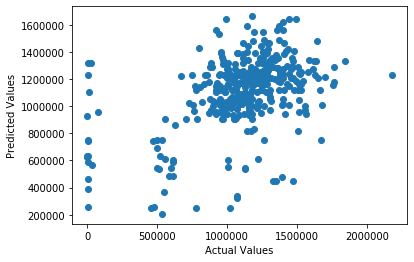

In [13]:
#Applying Random Forest Regression to Daily Aggregate Sales

train_set, test_set = train_test_split(daily_aggregate_sales, test_size=0.2, random_state=42, shuffle='false')

target = 'Sale (Dollars)'
features = list(train_set.columns)
features = [f for f in features if f != target]
features = [f for f in features if f != 'Date']

# Train set
X_tr = preprocessing.scale(train_set[features])
y_tr = train_set[[target]]

# Test set
X_te = preprocessing.scale(test_set[features])
y_te = test_set[[target]]

rnd_clf = RandomForestRegressor(n_estimators=1000)
rnd_clf.fit(X_tr, y_tr)

y_te_est = rnd_clf.predict(X_te)
final_mse = mean_squared_error(y_te, y_te_est)
final_rmse = np.sqrt(final_mse)

y_te_daily_aggregate_sales = y_te
y_te_daily_aggregate_sales['Date'] = daily_aggregate_sales['Date']
y_te_est_daily_aggregate_sales = y_te_est
y_te_daily_aggregate_sales['Prediction'] = y_te_est_daily_aggregate_sales
#y_te_est_daily_aggregate_sales['Date'] = daily_aggregate_sales['Date']

print("RMSE = ",final_rmse)

plt.scatter(x=y_te['Sale (Dollars)'], y=y_te_est)
plt.xlabel('Actual Values') 
plt.ylabel('Predicted Values') 
plt.show()

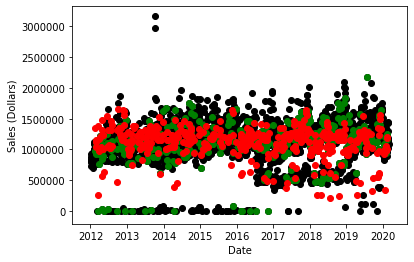

In [14]:
#Plotting the original data (black), the test data (green), and the predicted data for statewide daily aggregate sales

plt.scatter(x=daily_aggregate_sales['Date'], y=daily_aggregate_sales['Sale (Dollars)'],color='k')
plt.scatter(x=y_te_daily_aggregate_sales['Date'], y=y_te_daily_aggregate_sales['Sale (Dollars)'],color='g')
plt.scatter(x=y_te_daily_aggregate_sales['Date'], y=y_te_daily_aggregate_sales['Prediction'],color='r')
plt.xlabel('Date')
plt.ylabel('Sales (Dollars)')
plt.show()